<a href="https://colab.research.google.com/github/RegistryDev/AI-Basic/blob/master/4.8.2%20%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.8.2 선형회귀
### y=wx 형태의 선형회귀를 keras로 구현하기

### 라이브러리 임포트

In [ ]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 데이터 만들기

In [ ]:
# 0 부터 10 까지 총 11개이지만, 10개의 X값 만들기임.
X = np.linspace(0, 10, 10)                                                      # 왼쪽 함수 이름이 line이 아니라 lin(시작, 끝, 개수)임.
Y = X + np.random.randn(len(X))                                                 # 교재의 *X.shape보다 len(X)가 쓰기 더 편함. len(X)=10
                                                                                # np.random.randn(a): 표준정규분포(평균=0, 분산=1)를 사용하여 a개의 random 값 뽑아내기.
                                                                                # 만약 (a)의 a가 1이면 random 값을 추출하여 현재 X가 10개이므로 10개에 똑같이 더해줌.
                                                                                # 지금과 같이 a가 10이면 10개의 random 값을 추출하고, 10개의 X에 각각 더해주게됨.

### 데이터 조회

In [ ]:
for x, y in zip(X, Y):                                                          # zip(X, Y) : X와 Y의 각 값들을 순서에 맞춰서 튜플 항 (0, 0)으로 변환.
    print((round(x, 1), round(y, 1)))                                           # round(x, 1) : x값을 소수점 첫째 자리로 반올림.

(0.0, 0.8)
(1.1, 2.3)
(2.2, 3.4)
(3.3, 3.7)
(4.4, 3.9)
(5.6, 5.5)
(6.7, 6.9)
(7.8, 8.1)
(8.9, 7.5)
(10.0, 9.2)


### 선형회귀 모델 만들기

In [ ]:
model = Sequential()                                                            # keras의 선형회귀 모델 사용
model.add(
    Dense(
        input_dim = 1,                                                          # 입력자원 수
        units = 1,                                                              # 출력(예측)값 수
        activation = "linear",                                                  # 선형성 유지
        use_bias = False                                                        # y = wx + b(바이어스)의 형태에서 b가 없으므로 False
    )
)

# SGD(Stochastic Gradient Descent, 확률경사하강) optimizer 실행
sgd = optimizers.SGD(lr = 0.05)                                                 # 학습률(learning_late) : 너무 낮으면 학습 속도 느림. 너무 크면 학습이 제대로 수행되지 X.
model.compile(optimizer = 'sgd', loss = 'mse')                                  # .compile: keras 모델 설정. optimizer: 옵티마이저(나중에 배움), loss: 손실함수

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# 학습 전 최초 무작위로 설정된 가중치(weight) w값(여기서는 기울기) 조회
weights = model.layers[0].get_weights()                                         # layer(0)에 저장된 weight(가중치) 값들을 weights 리스트에 저장
w = weights[0][0][0]                                                            # 3중 리스트의 첫 번째 값이란 뜻. 첫 번째 layer의 첫 번째 weight 값과 동일.

print('최초 무작위 설정 가중치 w 값: %f' %w)                                    # 직접 수치 값 출력

최초 무작위 설정 가중치 w 값: -1.337168


### 선형회귀 모델 학습

In [ ]:
model.fit(
    X,                                                                          # 입력
    Y,                                                                          # 정답
    batch_size = 10,                                                            # 데이터 개수
    epochs = 10,                                                                # 반복학습 회수
    verbose = 1                                                                 # =0: 아무 것도 출력하지 않음, =2: epoch당 시간(초)와 loss 값만 출력
)

Epoch 1/10
1/1 [==============================] - 13s 13s/step - loss: 186.1242
Epoch 2/10
1/1 [==============================] - 0s 7ms/step - loss: 16.9172
Epoch 3/10
1/1 [==============================] - 0s 8ms/step - loss: 2.0623
Epoch 4/10
1/1 [==============================] - 0s 8ms/step - loss: 0.7581
Epoch 5/10
1/1 [==============================] - 0s 8ms/step - loss: 0.6436
Epoch 6/10
1/1 [==============================] - 0s 8ms/step - loss: 0.6336
Epoch 7/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6327
Epoch 8/10
1/1 [==============================] - 0s 8ms/step - loss: 0.6326
Epoch 9/10
1/1 [==============================] - 0s 3ms/step - loss: 0.6326
Epoch 10/10
1/1 [==============================] - 0s 3ms/step - loss: 0.6326


In [ ]:
# 학습 완료 후, 학습된 선형회귀 모델의 가중치 w값(여기서는 기울기) 조회
weights = model.layers[0].get_weights()
w = weights[0][0][0]

print('학습된 선형회귀 모델 가중치 w 값: %f' %w) 

학습된 선형회귀 모델 가중치 w 값: 0.958874


### 선형회귀 시각화

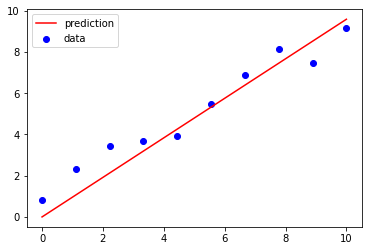

In [ ]:
plt.scatter(X, Y, label = 'data', color = 'blue')                               # X와 Y 위치에 파란 점 찍기, 이 점들의 명칭을 data로 함.
plt.plot(X, w * X, label = 'prediction', color = 'red')                         # X와 w * Y 위치에 점을 찍은 후 이들을 빨간선으로 연결하기, 빨간선의 명칭을 prediction으로 함.
plt.legend()                                                                    # 범례(명칭) 표시
plt.show()